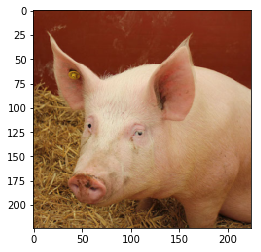

In [5]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

# read the image, resize . to 225 and convert to Pytorch Tensor
pig_img = Image.open("pig.jpg")
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
])
pig_tensor = preprocess(pig_img)[None, :, :, :]

plt.imshow(pig_tensor[0].numpy().transpose(1, 2, 0))

In [6]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return (x - self.mean.type_as(x)[None,:,None,None]) / self.std.type_as(x)[None,:,None,None]

norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

model = resnet50(pretrained=True)
model.eval();

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/tanimu/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:16<00:00, 6394901.94it/s]


In [7]:
pred = model(norm(pig_tensor))

In [9]:
import json 
with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i, x in json.load(f).items()}
print(imagenet_classes[pred.max(dim=1)[1].item()])

hog


In [10]:
print(nn.CrossEntropyLoss()(model(norm(pig_tensor)),torch.LongTensor([341])).item())

0.0038814544677734375


## Creating an adversarial example